In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['item_properties_part2.csv', 'category_tree.csv', 'events.csv', 'item_properties_part1.csv']


In [2]:
items1 = pd.read_csv('../input/item_properties_part1.csv')
items2 = pd.read_csv('../input/item_properties_part2.csv')
items = pd.concat([items1, items2])
items.head(10)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


In [3]:
items.shape

(20275902, 4)

In [4]:
import datetime
times =[]
for i in items['timestamp']:
    times.append(datetime.datetime.fromtimestamp(i//1000.0)) 

In [5]:
items['timestamp'] = times

In [6]:
items.head(10)

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513
5,2015-07-05 03:00:00,285026,available,0
6,2015-06-14 03:00:00,89534,213,1121373
7,2015-05-17 03:00:00,264312,6,319724
8,2015-06-07 03:00:00,229370,202,1330310
9,2015-06-14 03:00:00,98113,451,1141052 n48.000


In [7]:
#loading the event dataset

events = pd.read_csv('../input/events.csv')

In [8]:
events.head(10)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


In [9]:
events.shape

(2756101, 5)

Lets analyze events types

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64


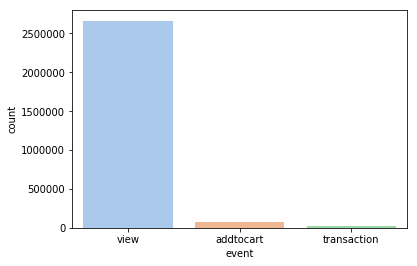

In [10]:
print(events['event'].value_counts())
sns.countplot(x= 'event', data=events, palette="pastel")

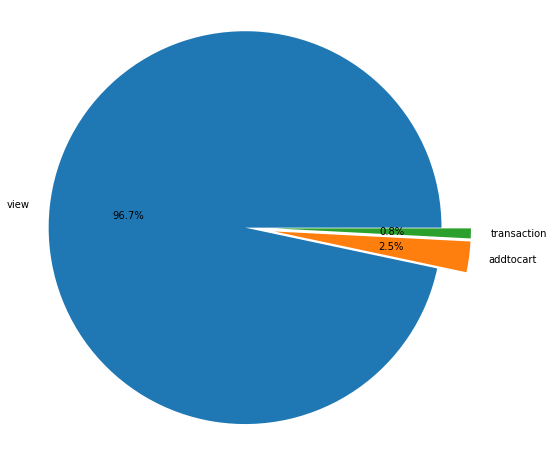

In [11]:
data = events.event.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.15, 0.15)  # explode 1st slice
plt.subplots(figsize=(8,8))
# Plot
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
 
plt.axis('equal')
plt.show()

Lets see category tree dataset

In [12]:
category_tree = pd.read_csv('../input/category_tree.csv')

In [13]:
category_tree.head(10)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


Category IDs explain the relationship of different products with each other e.g. Category ID 1016 is a child of Parent ID 213.

Below shows the number of items under category id 1016

In [14]:
items.loc[(items.property=='categoryid')&(items.value == '1016')].sort_values('timestamp').head()

,timestamp,itemid,property,value
7236969,2015-05-10 03:00:00,6777,categoryid,1016
8597591,2015-05-10 03:00:00,161686,categoryid,1016
9496408,2015-05-10 03:00:00,276491,categoryid,1016
6880131,2015-05-10 03:00:00,443058,categoryid,1016
7202531,2015-05-10 03:00:00,462004,categoryid,1016


Lets see unique and total visitors from event datasets

In [15]:
# all unique visitors
all_customers = events['visitorid'].unique()
print("Unique visitors:", all_customers.size)

# all visitors
print('Total visitors:', events['visitorid'].size)

Unique visitors: 1407580
Total visitors: 2756101


Now lets see the number of customers who acutally bought something

In [16]:
customer_purchased = events[events.transactionid.notnull()].visitorid.unique()
customer_purchased.size

11719

This shows that out of 1407580 unique visitors, 11719 visitors made at least a single purchase

now lets see how many items has categoyid or available as property

In [17]:
items_new = items.loc[items.property.isin(['categoryid', 'available']), :]
print("items with categoryid and available as propery:", items_new.size)
items_new.head(20)

items with categoryid and available as propery: 9167412


,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
5,2015-07-05 03:00:00,285026,available,0
15,2015-07-19 03:00:00,186518,available,0
79,2015-06-07 03:00:00,423682,available,0
82,2015-06-14 03:00:00,316253,available,1
96,2015-07-19 03:00:00,430459,available,0
101,2015-05-31 03:00:00,411262,available,0
116,2015-09-06 03:00:00,50372,available,0
119,2015-09-06 03:00:00,289043,available,0
133,2015-06-28 03:00:00,365407,available,0


In [18]:
#grouping itemid by its event type and creating list of each of them
grouped = events.groupby('event')['itemid'].apply(list)
grouped

event
addtocart      [5206, 10572, 255275, 356475, 312728, 63312, 1...
transaction    [356475, 15335, 81345, 150318, 310791, 54058, ...
view           [355908, 248676, 318965, 253185, 367447, 22556...
Name: itemid, dtype: object

Now lets check the most VIEWED items 

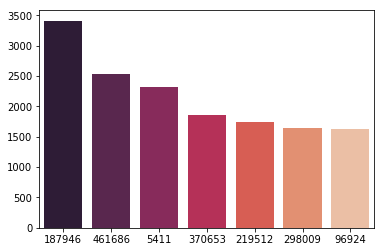

In [19]:
import operator
views = grouped['view']
# creating dictionary for key value pair 
count_view ={}
#since views is a list, we will convert it into numpy array for further manipulations
views = np.array(views[:])
#counting uniques values of views of this numpy views array
unique, counts = np.unique(views, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_view = dict(zip(unique, counts))
#sorting the dictionary
sort_count_view = sorted(count_view.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_view[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_view[:7]]
sns.barplot(x, y, order=x, palette="rocket")

Lets see the most ADDTOCART items

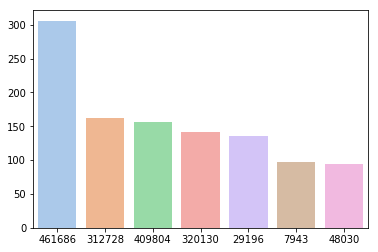

In [20]:
addtocart = grouped['addtocart']
# creating dictionary for key value pair 
count_addtocart ={}
#since addtocart is a list, we will convert it into numpy array for further manipulations
addtocart = np.array(addtocart[:])
#counting uniques values of addtocart items of this numpy addtocart array
unique, counts = np.unique(addtocart, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_addtocart = dict(zip(unique, counts))
#sorting the dictionary
sort_count_addtocart = sorted(count_addtocart.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_addtocart[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_addtocart[:7]]
sns.barplot(x, y, order=x, palette="pastel")

Checking the most TRANSACION itemids

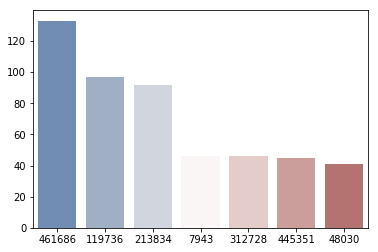

In [21]:
transaction = grouped['transaction']
# creating dictionary for key value pair 
count_transaction ={}
#since addtocart is a list, we will convert it into numpy array for further manipulations
transaction = np.array(transaction[:])
#counting uniques values of addtocart items of this numpy addtocart array
unique, counts = np.unique(transaction, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_transaction = dict(zip(unique, counts))
#sorting the dictionary
sort_count_transaction = sorted(count_transaction.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_transaction[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_transaction[:7]]
sns.barplot(x, y, order=x, palette="vlag")

In [22]:
#analyzing 461686 itemid
events.loc[(events.itemid==461686)]

,timestamp,visitorid,event,itemid,transactionid
5632,1433179439299,1026179,view,461686,NaN
8782,1433176153804,668227,view,461686,NaN
9651,1433140509491,693466,view,461686,NaN
10749,1433196464528,248754,view,461686,NaN
13618,1433142326018,1207651,view,461686,NaN
20290,1433220771412,994896,view,461686,NaN
22914,1433196652052,1132241,view,461686,NaN
24611,1433273987408,819285,view,461686,NaN
28578,1433305743768,757557,view,461686,NaN
34692,1433270579704,1309072,view,461686,NaN


Now lets offer visitor a list of items of what previous visitors bought TOGETHER with the item they are currently viewing. This way we can guide them in their buying journey

In [23]:
# first - lets create a list of visitors who made a purchase
customer_purchased = events[events.transactionid.notnull()].visitorid.unique()

#lets create a list of purchased items
purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events.loc[(events.visitorid == customer) & (events.transactionid.notnull())].itemid.values))

In [24]:
purchased_items[:7]

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044],
 [54058,
  284871,
  251130,
  268335,
  183049,
  261940,
  369093,
  370745,
  192990,
  277119,
  241716,
  283766,
  16417,
  217068,
  36372,
  68923,
  428015,
  69533,
  13520,
  385638,
  442871,
  136526,
  247862,
  93828,
  230911,
  382595,
  34853,
  216260,
  154812,
  445241,
  57702,
  347850,
  151855,
  226327,
  288525,
  51354,
  345994,
  170438,
  254301,
  266439,
  193718,
  388558,
  26745,
  184086,
  79956,
  252040,
  82232,
  309821,
  394518,
  462070,
  331980,
  353111,
  200527,
  235933,
  68532,
  358882,
  60012,
  29741,
  270487,
  163689,
  6913,
  156457,
  341578,
  163352,
  234493,
  135174,
  452481,
  241755,
  56323,
  210137,
  184397,
  285202,
  198690,
  195958,
  239210,
  71640,
  189108,
  369112,
  346186,
  211207,
  134330,
  257070,
  302239,
  459480,
  57577,
  1952

lets define the function that would show items that were bought together by the same customer

In [25]:
def recommend_items(item_id, purchased_items):
    recommendation_list =[]
    for x in purchased_items:
        if item_id in x:
            recommendation_list +=x
    
    # remove the pass item from the list and merge the above created list
    recommendation_list = list(set(recommendation_list) - set([item_id]))
    return recommendation_list
            

Lets recommend items from a customer who previously bought ,when a visitor is viewing item_id = 200793

In [26]:
recommend_items(200793, purchased_items)

[105792, 12836, 80582, 380775, 15335, 400969, 25353, 302422, 237753, 317178]

In [27]:
events.head(5)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


Lets start modeling using **LightFM**

lets import required libraries

In [28]:
from lightfm import LightFM
from lightfm.evaluation import auc_score
from scipy.sparse import coo_matrix
from sklearn import preprocessing

In [29]:
events = events.assign(date=pd.Series(datetime.datetime.fromtimestamp(i/1000).date() for i in events.timestamp))
events = events.sort_values('date').reset_index(drop=True)
events = events[['visitorid','itemid','event', 'date']]
events.head(5)

,visitorid,itemid,event,date
0,689859,421640,view,2015-05-03
1,935582,203248,view,2015-05-03
2,696326,194830,view,2015-05-03
3,131668,395045,view,2015-05-03
4,595484,129111,view,2015-05-03


In [30]:
start_date = '2015-5-3'
end_date = '2015-5-18'
fd = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date()
events = events[(events.date >= fd(start_date)) & (events.date <= fd(end_date))]

In [31]:
split_point = np.int(np.round(events.shape[0]*0.8))
events_train = events.iloc[0:split_point]
events_test = events.iloc[split_point::]
events_test = events_test[(events_test['visitorid'].isin(events_train['visitorid'])) & (events_test['itemid'].isin(events_train['itemid']))]

In [32]:
id_cols=['visitorid','itemid']
trans_cat_train=dict()
trans_cat_test=dict()

for k in id_cols:
    cate_enc=preprocessing.LabelEncoder()
    trans_cat_train[k]=cate_enc.fit_transform(events_train[k].values)
    trans_cat_test[k]=cate_enc.transform(events_test[k].values)

In [33]:
ratings = dict()

cate_enc=preprocessing.LabelEncoder()
ratings['train'] = cate_enc.fit_transform(events_train.event)
ratings['test'] = cate_enc.transform(events_test.event)

In [34]:
n_users=len(np.unique(trans_cat_train['visitorid']))
n_items=len(np.unique(trans_cat_train['itemid']))

In [35]:
rate_matrix = dict()
rate_matrix['train'] = coo_matrix((ratings['train'], (trans_cat_train['visitorid'], trans_cat_train['itemid'])), shape=(n_users,n_items))
rate_matrix['test'] = coo_matrix((ratings['test'], (trans_cat_test['visitorid'], trans_cat_test['itemid'])), shape=(n_users,n_items))

In [36]:
model = LightFM(no_components=10, loss='warp')
model.fit(rate_matrix['train'], epochs=100, num_threads=8)

In [37]:
auc_score(model, rate_matrix['train'], num_threads=8).mean()

0.99864537

In [38]:
auc_score(model, rate_matrix['test'], num_threads=10).mean()

0.8167802